In [2]:
pip install cartopy matplotlib pandas

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from scipy.interpolate import griddata


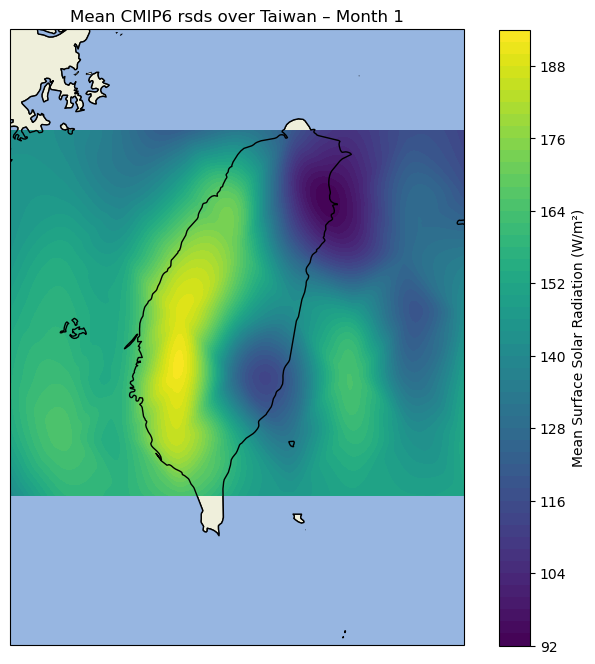

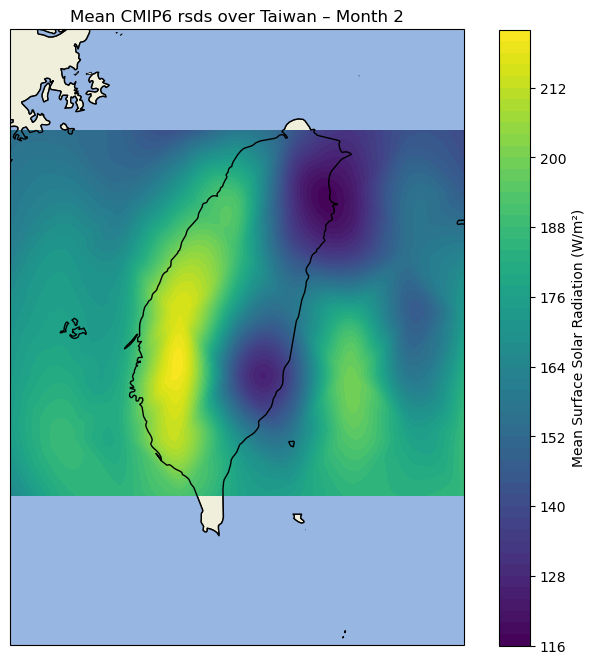

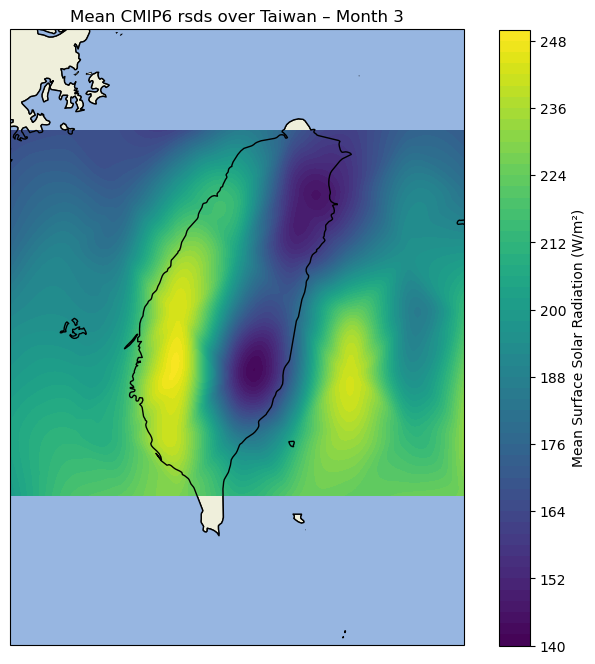

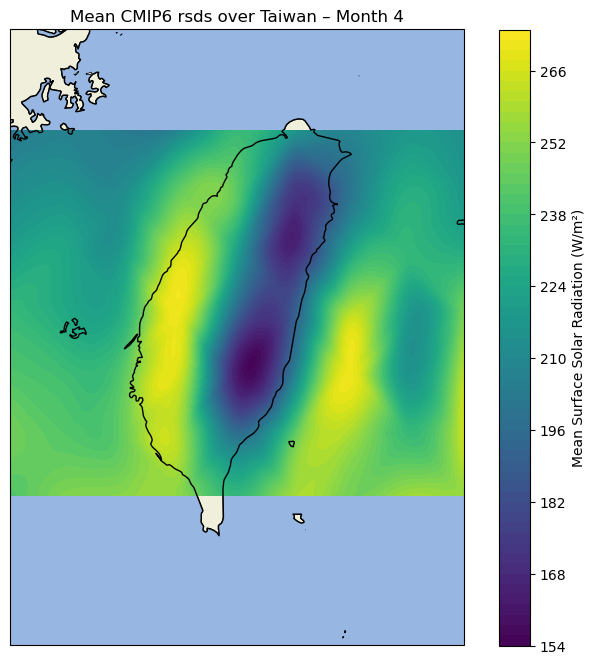

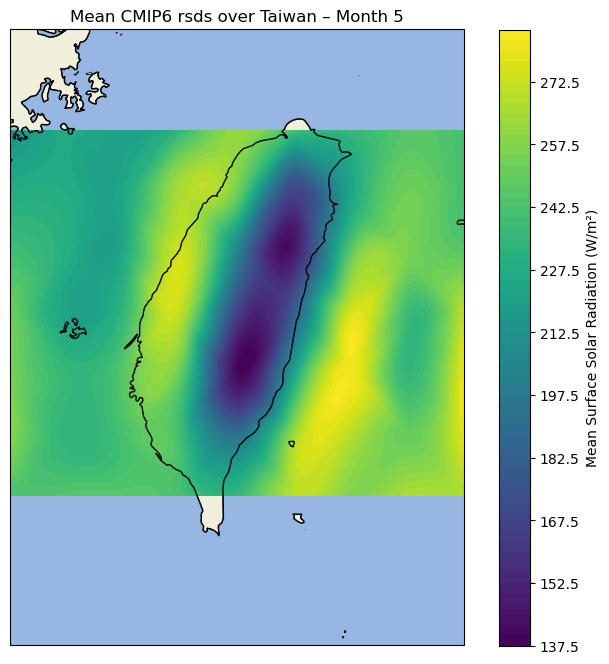

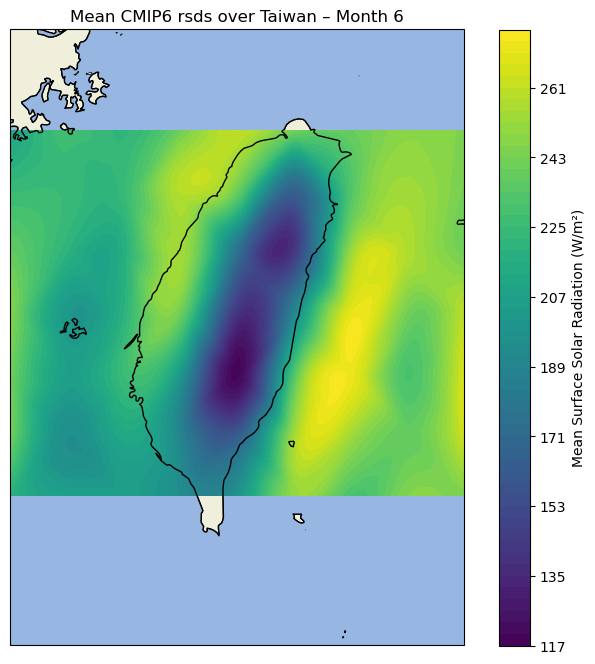

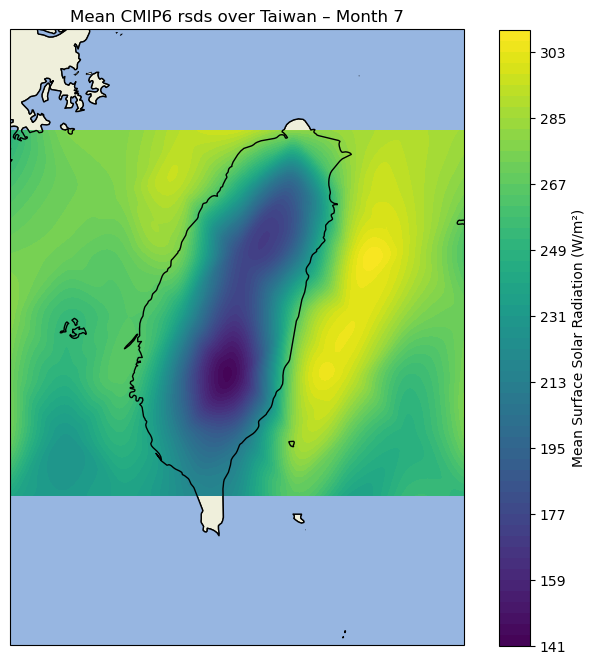

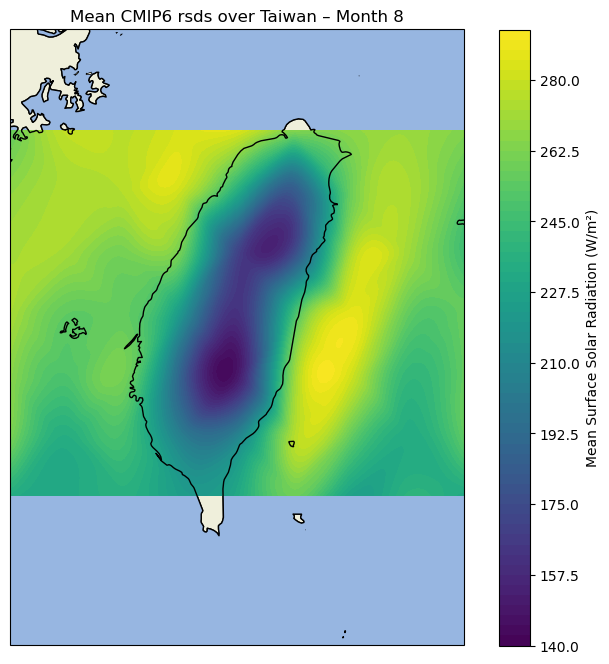

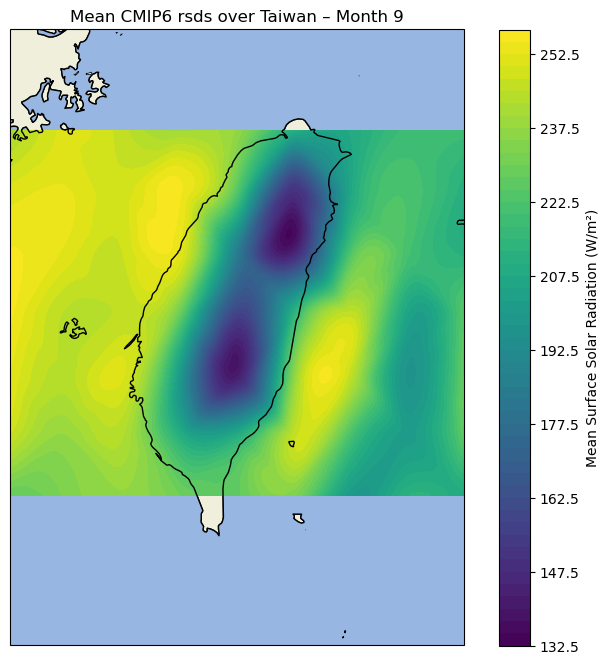

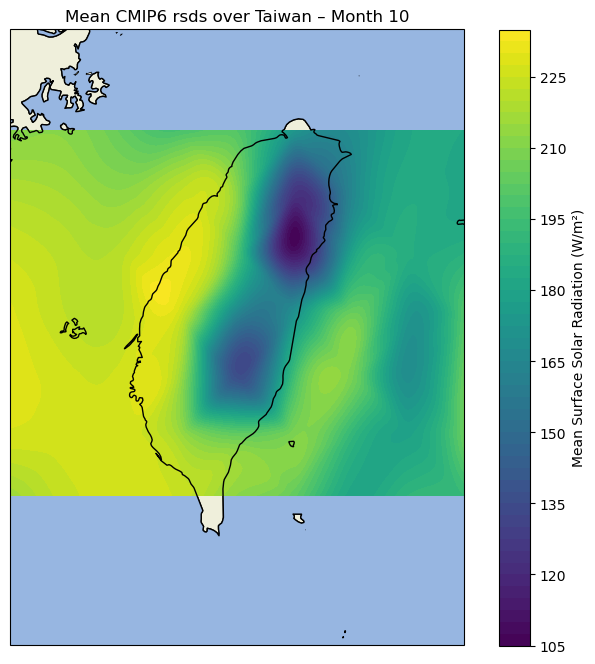

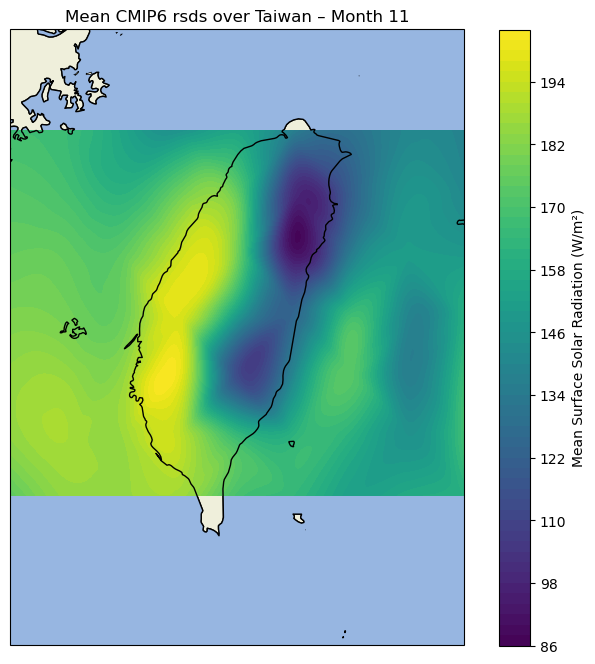

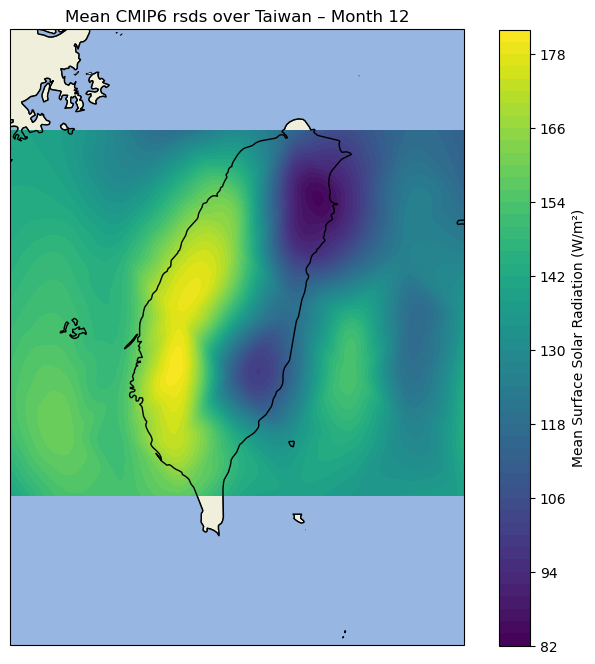

In [4]:

# Load your CSV
df = pd.read_csv(r"C:\Users\User\Downloads\rsds_radiation_CNRM_CM6_ssp245_2015_2099.csv")
df.columns = df.columns.str.strip()
df["time"] = pd.to_datetime(df["time"])

# Add month column
df["month"] = df["time"].dt.month

# Create grid
num_points = 200
lon_grid = np.linspace(119, 123, num_points)
lat_grid = np.linspace(21, 26, num_points)
lon2d, lat2d = np.meshgrid(lon_grid, lat_grid)

# Loop through months 1–12
for month in range(1, 13):
    df_month = df[df["month"] == month]
    df_month_mean = df_month.groupby(["lon", "lat"])["rsds"].mean().reset_index()

    points = df_month_mean[["lon", "lat"]].values
    values = df_month_mean["rsds"].values

    grid_rsds = griddata(points, values, (lon2d, lat2d), method="cubic")

    fig = plt.figure(figsize=(9, 8))
    ax = plt.axes(projection=ccrs.Mercator())
    ax.set_extent([119, 123, 21, 26], crs=ccrs.PlateCarree())
    ax.coastlines(resolution="10m")
    ax.add_feature(cfeature.BORDERS, linestyle=":")
    ax.add_feature(cfeature.LAND, edgecolor="black")
    ax.add_feature(cfeature.OCEAN)

    cf = ax.contourf(
        lon2d, lat2d, grid_rsds, 60,
        transform=ccrs.PlateCarree(), cmap="viridis"
    )

    plt.colorbar(cf, ax=ax, label="Mean Surface Solar Radiation (W/m²)")
    plt.title(f"Mean CMIP6 rsds over Taiwan – Month {month}")
    plt.show()


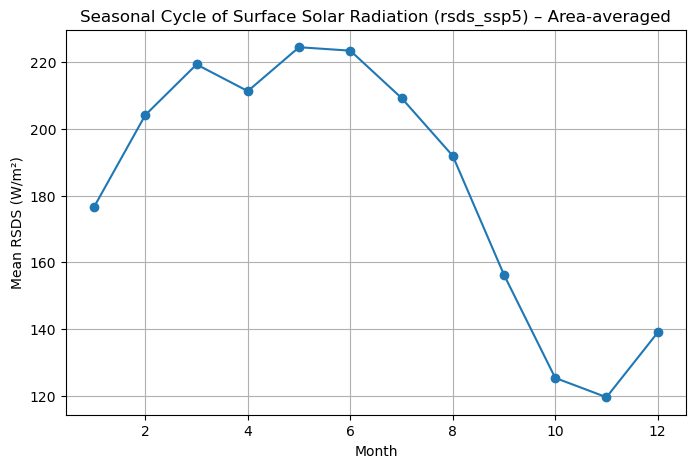

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv(r"C:\Users\User\Downloads\cmip6_rsds_gfdl.csv")

df["time"] = pd.to_datetime(df["time"], format="%Y/%m/%d")

# Choose scenario
scenario = "rsds_ssp5"  # Change to 'rsds_ssp3' or 'rsds_ssp5' as needed

# Extract month
df["month"] = df["time"].dt.month

# Calculate monthly climatology (mean over all years) for each lat-lon
monthly_clim = df.groupby(["lat", "lon", "month"])[scenario].mean().reset_index()

# Area-averaged seasonal cycle
monthly_mean = monthly_clim.groupby("month")[scenario].mean()

# Plot
plt.figure(figsize=(8,5))
plt.plot(monthly_mean.index, monthly_mean.values, marker="o")
plt.title(f"Seasonal Cycle of Surface Solar Radiation ({scenario}) – Area-averaged")
plt.xlabel("Month")
plt.ylabel("Mean RSDS (W/m²)")
plt.grid()
plt.show()


Closest grid point to (23, 121.0): (23.21772948, 121.0)


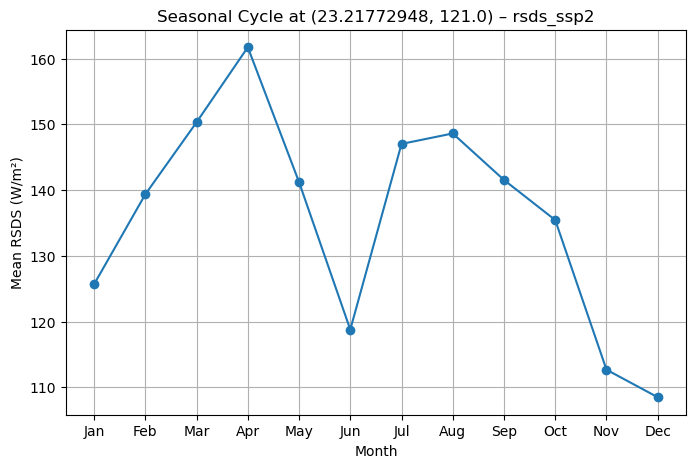

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv(r"C:\Users\User\Downloads\cmip6_rsds_cnrmfull.csv")
df["time"] = pd.to_datetime(df["time"], format="%Y/%m/%d")

# Choose scenario
scenario = "rsds_ssp2"  # Change as needed: 'rsds_ssp2', 'rsds_ssp3', 'rsds_ssp5'

# Extract month
df["month"] = df["time"].dt.month

# User input target lat/lon
target_lat = 23
target_lon = 121.0

# Calculate distance to each grid point to find closest
df["distance"] = np.sqrt((df["lat"] - target_lat)**2 + (df["lon"] - target_lon)**2)
closest_point = df.loc[df["distance"].idxmin()]
closest_lat = closest_point["lat"]
closest_lon = closest_point["lon"]

print(f"Closest grid point to ({target_lat}, {target_lon}): ({closest_lat}, {closest_lon})")

# Filter data for that grid point
df_point = df[(df["lat"] == closest_lat) & (df["lon"] == closest_lon)]

# Calculate monthly climatology (mean over all years) for the selected point
monthly_mean = df_point.groupby("month")[scenario].mean()

# Plot
plt.figure(figsize=(8,5))
plt.plot(monthly_mean.index, monthly_mean.values, marker="o")
plt.title(f"Seasonal Cycle at ({closest_lat}, {closest_lon}) – {scenario}")
plt.xlabel("Month")
plt.ylabel("Mean RSDS (W/m²)")
plt.xticks(np.arange(1,13), ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.grid()
plt.show()


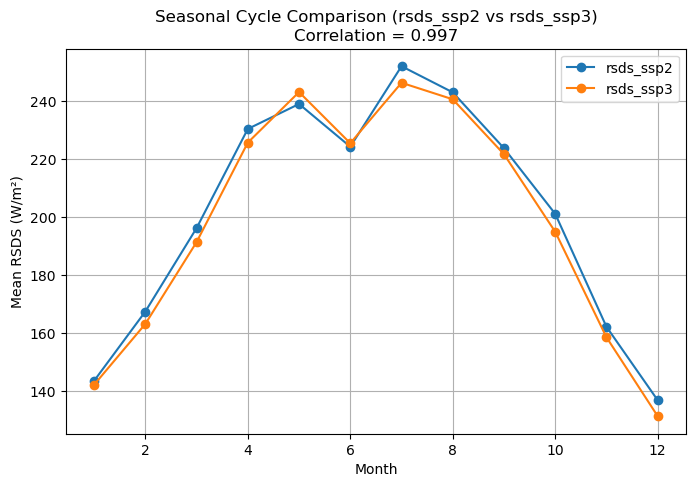

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv(r"C:\Users\User\Downloads\cmip6_rsds_cnrmfull.csv")
df["time"] = pd.to_datetime(df["time"], format="%Y/%m/%d")

# Define the two scenarios to compare
scn1 = "rsds_ssp2"
scn2 = "rsds_ssp3"

# Extract month
df["month"] = df["time"].dt.month

# Calculate monthly climatology for each lat-lon for both scenarios
monthly_clim_scn1 = df.groupby(["lat", "lon", "month"])[scn1].mean().reset_index()
monthly_clim_scn2 = df.groupby(["lat", "lon", "month"])[scn2].mean().reset_index()

# Calculate area-averaged monthly mean for both scenarios
monthly_mean_scn1 = monthly_clim_scn1.groupby("month")[scn1].mean()
monthly_mean_scn2 = monthly_clim_scn2.groupby("month")[scn2].mean()

# Calculate Pearson correlation coefficient between the two seasonal cycles
corr = np.corrcoef(monthly_mean_scn1.values, monthly_mean_scn2.values)[0,1]

# Plot both seasonal cycles
plt.figure(figsize=(8,5))
plt.plot(monthly_mean_scn1.index, monthly_mean_scn1.values, marker="o", label=f"{scn1}")
plt.plot(monthly_mean_scn2.index, monthly_mean_scn2.values, marker="o", label=f"{scn2}")
plt.title(f"Seasonal Cycle Comparison ({scn1} vs {scn2})\nCorrelation = {corr:.3f}")
plt.xlabel("Month")
plt.ylabel("Mean RSDS (W/m²)")
plt.legend()
plt.grid()
plt.show()


Closest grid point to (23, 121.0): (22.5, 120.625)


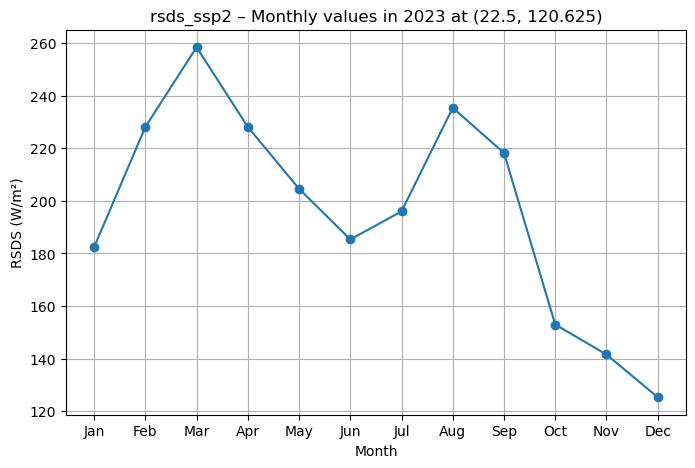

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv(r"C:\Users\User\Downloads\cmip6_rsds_gfdl.csv")
df["time"] = pd.to_datetime(df["time"], format="%Y/%m/%d")

# Choose scenario
scenario = "rsds_ssp2"

# Extract year and month
df["year"] = df["time"].dt.year
df["month"] = df["time"].dt.month

# User input target lat/lon and year
target_lat = 23
target_lon = 121.0
target_year = 2023

# Calculate distance to each grid point to find closest
df["distance"] = np.sqrt((df["lat"] - target_lat)**2 + (df["lon"] - target_lon)**2)
closest_point = df.loc[df["distance"].idxmin()]
closest_lat = closest_point["lat"]
closest_lon = closest_point["lon"]

print(f"Closest grid point to ({target_lat}, {target_lon}): ({closest_lat}, {closest_lon})")

# Filter data for that grid point and target year
df_point = df[(df["lat"] == closest_lat) & (df["lon"] == closest_lon) & (df["year"] == target_year)]

# Calculate monthly mean (if multiple entries per month) or pick first entry per month
monthly_value = df_point.groupby("month")[scenario].mean()

# Plot
plt.figure(figsize=(8,5))
plt.plot(monthly_value.index, monthly_value.values, marker="o")
plt.title(f"{scenario} – Monthly values in {target_year} at ({closest_lat}, {closest_lon})")
plt.xlabel("Month")
plt.ylabel("RSDS (W/m²)")
plt.xticks(np.arange(1,13), ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.grid()
plt.show()


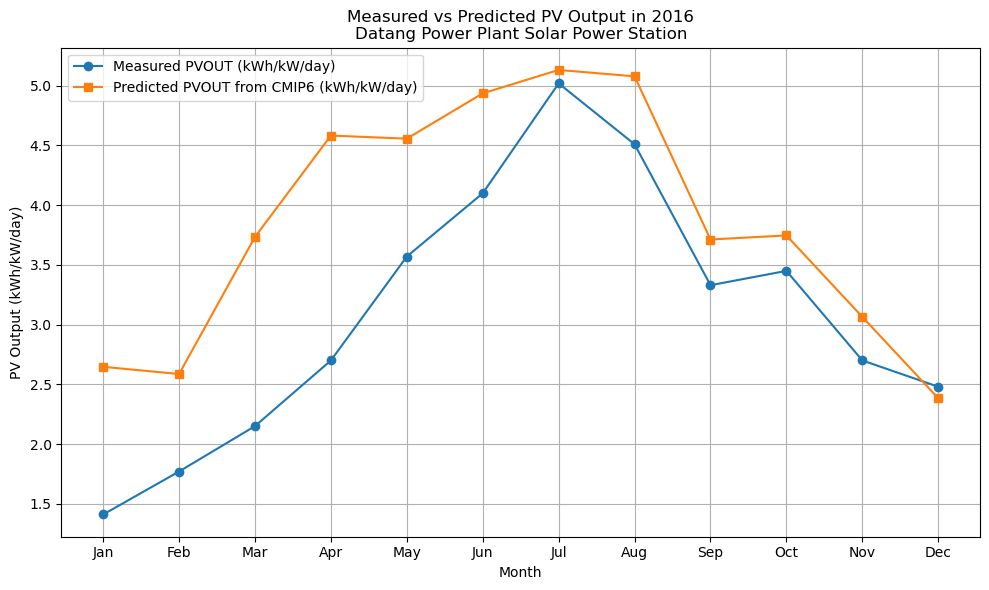

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

# -------------------------------
# 1. Load power plant measured data
# -------------------------------

plant_df = pd.read_csv(r"C:\Users\User\Downloads\solar_power_station_monthly_summary_position_updated.csv")
plant_df.columns = plant_df.columns.str.strip()

# Convert 'date' to datetime and extract year/month
plant_df['date'] = pd.to_datetime(plant_df['date'])
plant_df['year'] = plant_df['date'].dt.year
plant_df['month'] = plant_df['date'].dt.month

# User input: target power plant and year
target_name = "Datang Power Plant Solar Power Station"
target_year = 2016

# Filter for the target plant and year
df_target = plant_df[(plant_df['name'] == target_name) & (plant_df['year'] == target_year)]
df_target = df_target.sort_values('month')

# Get lat/lon for this plant
target_lat = df_target['lat'].iloc[0]
target_lon = df_target['lon'].iloc[0]

# Extract measured monthly average daily output
measured_pvout = df_target['monthly_avg_daily_output']

# -------------------------------
# 2. Load CMIP6 RSDS data
# -------------------------------

cmip_df = pd.read_csv(r"C:\Users\User\Downloads\cmip6_rsds_cnrmfull.csv")
cmip_df["time"] = pd.to_datetime(cmip_df["time"], format="%Y/%m/%d")

# Choose scenario
scenario = "rsds_ssp5"

# Extract year and month
cmip_df["year"] = cmip_df["time"].dt.year
cmip_df["month"] = cmip_df["time"].dt.month

# Filter for target year
cmip_year = cmip_df[cmip_df["year"] == target_year]

# -------------------------------
# 3. Interpolate RSDS to target position and calculate PVOUT
# -------------------------------

interp_monthly_rsds = []

for month in range(1,13):
    df_month = cmip_year[cmip_year["month"] == month]
    
    # Calculate monthly mean RSDS at each grid point
    df_month_mean = df_month.groupby(["lat","lon"])[scenario].mean().reset_index()
    
    # Prepare points and values for interpolation
    points = df_month_mean[["lat","lon"]].values
    values = df_month_mean[scenario].values
    
    # Interpolate to target position using cubic
    interp_value = griddata(points, values, (target_lat, target_lon), method='cubic')
    
    # Fallback to nearest if cubic fails
    if np.isnan(interp_value):
        interp_value = griddata(points, values, (target_lat, target_lon), method='nearest')
    
    interp_monthly_rsds.append(interp_value)

# -------------------------------
# 4. Convert RSDS to PVOUT (formula split out for later revision)
# -------------------------------

# Define function to convert rsds to pvout (simplified)
def rsds_to_pvout(rsds_wm2):
    # Example assumptions:
    # - PV system efficiency: 15% (adjust later as needed)
    # - Convert from W/m² to kWh/m²/day: multiply by 24 / 1000
    # Final formula: rsds * 24 * efficiency / 1000
    efficiency = 0.8
    pvout_kwh_m2_day = rsds_wm2 * 24 / 1000 * efficiency
    return pvout_kwh_m2_day

# Apply conversion
predicted_pvout = [rsds_to_pvout(x) for x in interp_monthly_rsds]

# -------------------------------
# 5. Plot comparison
# -------------------------------

plt.figure(figsize=(10,6))
plt.plot(range(1,13), measured_pvout, marker="o", label="Measured PVOUT (kWh/kW/day)")
plt.plot(range(1,13), predicted_pvout, marker="s", label="Predicted PVOUT from CMIP6 (kWh/kW/day)")
plt.title(f"Measured vs Predicted PV Output in {target_year}\n{target_name}")
plt.xlabel("Month")
plt.ylabel("PV Output (kWh/kW/day)")
plt.xticks(np.arange(1,13), ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()
